# Clustering Whisky Distillers
In this notebook, I try to group whisky distillers according to their taste profile.

For this task, the method I will use is called K-Means clustering which is an unsupervised machine learning algorithm well suited for such a task.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('data/whisky.csv', index_col='RowID')
df.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
RowID,,,,,,,,,,,,,,,,
1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 1 to 86
Data columns (total 16 columns):
Distillery    86 non-null object
Body          86 non-null int64
Sweetness     86 non-null int64
Smoky         86 non-null int64
Medicinal     86 non-null int64
Tobacco       86 non-null int64
Honey         86 non-null int64
Spicy         86 non-null int64
Winey         86 non-null int64
Nutty         86 non-null int64
Malty         86 non-null int64
Fruity        86 non-null int64
Floral        86 non-null int64
Postcode      86 non-null object
Latitude      86 non-null int64
Longitude     86 non-null int64
dtypes: int64(14), object(2)
memory usage: 11.4+ KB


There's a total of 86 whisky distillers in the dataset. None of them have any missing values.

Only the Distillery and Postcode columns are non-numeric, and the rest are integer data types.

In [4]:
df.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,287247.162791,8.026597e+05
std,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,67889.046814,8.802422e+04
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,5.542600e+05
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,265672.500000,7.556975e+05
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,319515.000000,8.398850e+05
75%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,328630.000000,8.507700e+05
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06


All the numerical columns (except for geographical mapping columns) seems to be categorical as they are integers which range from 1 to 4. This means that we are dealing with categorical data for the most part here.

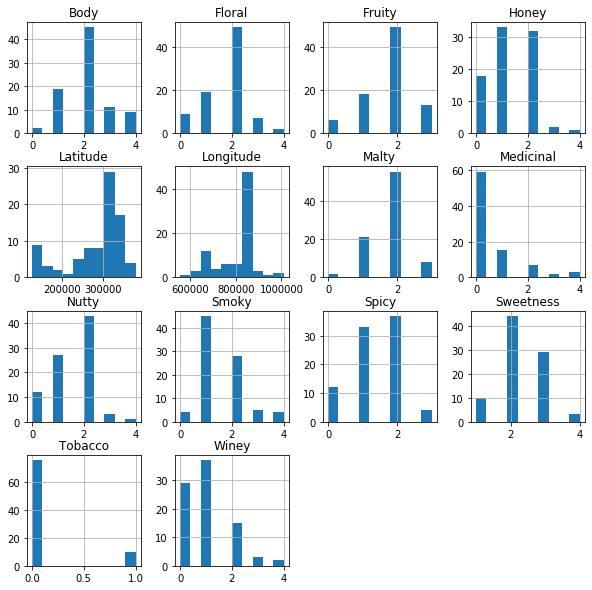

In [5]:
df.hist(figsize=(10,10))
plt.show()

Looking at the data , it seems like it is mostly made up of categorical features. The only continous features are geo location features.

## Postcodes and Distillery are text columns
It would only make sense for me to drop them as they are non numeric and not categorical but text which does not influence the output.

In [6]:
df= df.drop(['Postcode', 'Distillery', 'Longitude', 'Latitude', 'Body'], axis=1)

In [7]:
df.head()

,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
RowID,,,,,,,,,,,
1,2,2,0,0,2,1,2,2,2,2,2
2,3,1,0,0,4,3,2,2,3,3,2
3,3,2,0,0,2,0,0,2,2,3,2
4,1,4,4,0,0,2,0,1,2,1,0
5,2,2,0,0,1,1,1,2,3,1,1


## Dimensionality reduction
Since this dataset has a lot of features, visualizing the clusters is hard. So glady, the dataset can be reduced down to only the important components without losing much quality on the data. So I reduce it down to 2 dimension.

In [8]:
from sklearn.decomposition import KernelPCA
np.random.seed(42)
rbf_pca= KernelPCA(n_components=2, kernel='rbf')
X_reduced= rbf_pca.fit_transform(df)


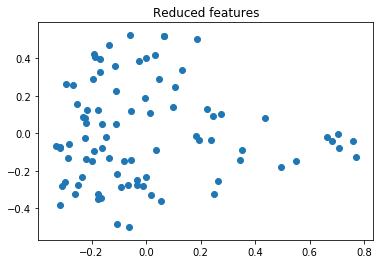

In [9]:
#feature a and b
x=X_reduced[:,0]
y=X_reduced[:,1]

plt.scatter(x, y)
plt.title('Reduced features')
plt.show()

# Clustering
I will then apply k-means clustering to group the whisky distillers into their respective clusters.
But firstly I need to figure out how many clusters are best to use. To do that, I will use the elbow method which proves to be an easy to interpret graph.

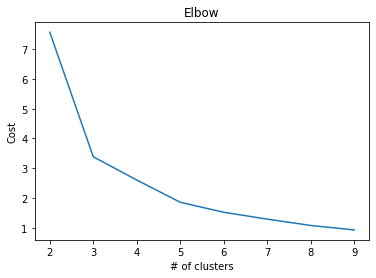

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


sil_scores=[]
costs=[]
for clusters in range(2,10):
    km= KMeans(n_clusters=clusters, random_state=42)
    km.fit(X_reduced)
    
    #loss
    costs.append(km.inertia_)
    #predict cluster
    labels= km.predict(X_reduced)
    
    #silhouette score
    sil_score= silhouette_score(X_reduced, labels)   
    sil_scores.append(sil_score)
    
plt.plot(range(2,10), costs)
plt.title('Elbow')
plt.xlabel('# of clusters')
plt.ylabel('Cost')
plt.show()
    

From the elbow plot seen above, it is clear that 3 would be a great number of cluster to use. 5 also looks interesting, so I will perform a Silhouette test.

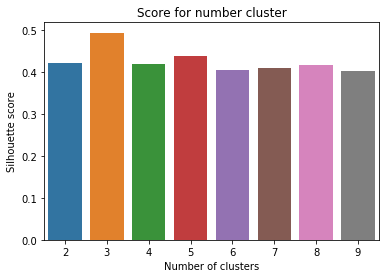

In [11]:
sns.barplot(x=list(range(2,10)), y=sil_scores)
plt.title('Score for number cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Now it is evident that 3 clusters are more likely to give us a better results as we see 3 clusters rank the highest.

## Final Model
Now that I have figured out that 3 clusters would be best for the data, I use it to cluster the whisky distillers at last.

In [12]:
km= KMeans(n_clusters=3, random_state=42)
y_preds= km.fit_predict(X_reduced)

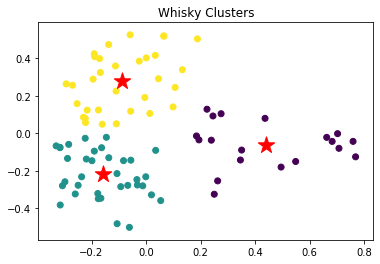

In [26]:

plt.scatter(x, y, c=y_preds, cmap='viridis' )
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='*')
#plt.legend(loc='upper left')
plt.title('Whisky Clusters')
plt.show()

Looking at the scatterplot above, it is easy to see the various clusters whisky distillers are separable by their tasting profiles.

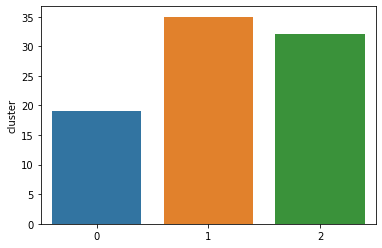

In [18]:
df['cluster']= y_preds

clusters= df.cluster.value_counts()
sns.barplot(x=clusters.index, y=clusters)

Most distillers belong to the cluster 1 followed by 2 and 0.

# Conclusion
In this project, I successfully used K means to cluster whisky distillers by their tasting profiles. This model proved to be a great unsupervised machine learning tool.